# Load Imports

In [1]:
# python imports
import os
import json
from math import pi

# third-party imports
import matplotlib.pyplot as plt

## Config

In [2]:
NETWORK_NAME = 'Network01'
PREFIX = 'scenario-1'

SAVE_FIG = False
SHOW_TITLE = False

OUTPUT_FIG = 'imgs'

## Globals

In [3]:
SEVERITY_LABELS = ['LOW', 'MEDIUM', 'HIGH', 'CRITICAL']
RISK_LABELS = ['LOW', 'MODERATE', 'IMPORTANT', 'CRITICAL']

COLORS = ['#14943D', '#FDBE0E', '#FC7303', '#F20101']

# Utils

In [4]:
def vulns_per_severity(cvss_dist, risk_dist):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4), sharey=True)

    if SHOW_TITLE:
        fig.suptitle('Distribuição das Vulnerabilidades por Severidade')

    fig.supylabel('Distribuição das Vulnerabilidades (%)', size=14)

    ax1.set_title('(a) CVSS')
    
    indexes = SEVERITY_LABELS
    values = [cvss_dist[label] for label in SEVERITY_LABELS]

    pps = ax1.bar(indexes, [val / sum(cvss_dist.values()) for val in values], color=COLORS)
    for p, val in zip(pps, values):
        ax1.annotate(val, xy=(p.get_x() + p.get_width() / 2, p.get_height() / 2), 
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    ax1.xaxis.set_ticks(indexes)
    ax1.set_xticklabels(indexes, rotation=45)
    ax1.grid(True, linestyle='-', alpha=.10)

    ax2.set_title('(b) FRAPE')
    
    indexes = RISK_LABELS
    values = [risk_dist[label] for label in RISK_LABELS]

    pps = ax2.bar(indexes, [val / sum(risk_dist.values()) for val in values], color=COLORS)
    for p, val in zip(pps, values):
        ax2.annotate(val, xy=(p.get_x() + p.get_width() / 2, p.get_height() / 2), 
                     xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    ax2.xaxis.set_ticks(indexes)
    ax2.set_xticklabels(indexes, rotation=45)
    ax2.grid(True, linestyle='-', alpha=.10)
    
    if SAVE_FIG:
        plt.savefig(f'{OUTPUT_FIG}/{PREFIX}-vulns-dist.pdf', bbox_inches='tight', dpi=1200)

    plt.show()

In [5]:
def assets_per_context(context):
    fig, axes = plt.subplots(2, 3, figsize=(10, 6), constrained_layout=True, sharey=True)
    
    if SHOW_TITLE:
        fig.suptitle('Distribuição dos ativos por características de contexto', size=14)
    
    fig.supylabel('Distribuição dos Ativos (%)', size=14)
    
    ctx_names_dict = {
        'topology': ('Topologia', ['LOCAL', 'DMZ']),
        'asset_type': ('Tipo do Ativo', ['WORKSTATION', 'SERVER']),
        'environment': ('Ambiente', ['DEVELOPMENT', 'PRODUCTION']),
        'sensitive_data': ('Dados Sensíveis', ['FALSE', 'TRUE']),
        'end_of_life': ('Fim da Vida', ['FALSE', 'TRUE']), 
        'critical_asset': ('Ativos Críticos', ['FALSE', 'TRUE'])
    }
    
    for ax, (key, value) in zip(axes.flatten(), context.items()):
        
        title, xlabels = ctx_names_dict[key]
        
        ax.set_title(title)
        ax.bar(xlabels, [1 - value, value])
        ax.grid(True, linestyle='-', alpha=.10)
    
    if SAVE_FIG:
        plt.savefig(f'{OUTPUT_FIG}/{PREFIX}-assets-ctx.pdf', bbox_inches='tight', dpi=1200)

    plt.show()

## Load data

In [6]:
context = dict()

cvss_dist = list()
risk_dist = list()

for file in os.listdir(f'../output/{NETWORK_NAME}/'):
    if file.endswith('.json'):
        with open(f'../output/{NETWORK_NAME}/{file}') as f:
                        
            file = json.load(f)
            
            # loading environment configuration
            
            context = file['network_config']['context']          

            # loading values

            cvss_dist = file['stats']['cvss']['base_severity'][0]
            risk_dist = file['stats']['cvss']['risk_score'][0]
    # exit loop after 
    # first iteration   
    break

# Run

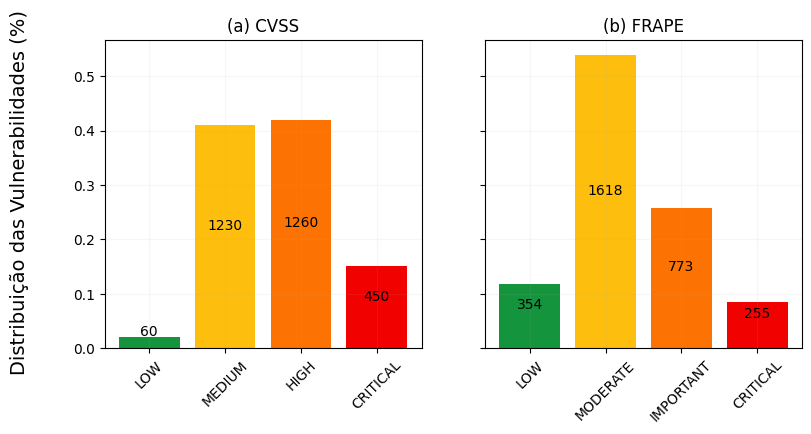

In [7]:
vulns_per_severity(cvss_dist, risk_dist)

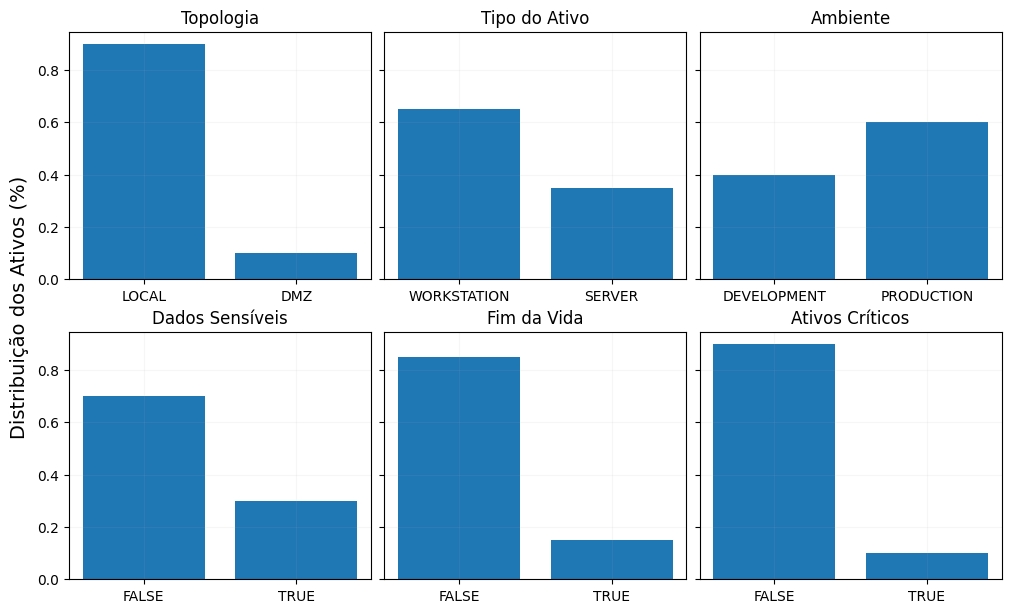

In [8]:
assets_per_context(context)